<a href="https://colab.research.google.com/github/tamnhu2913/BCG-DataScience/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes = True)
%matplotlib inline

# Loading Data with Pandas

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
price_data = pd.read_csv('/content/drive/MyDrive/Data Science/Data/price_data (1).csv')
client_data = pd.read_csv('/content/drive/MyDrive/Data Science/Data/client_data (1).csv')

In [5]:
#view the first 5 rows of each dataframe
price_data.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
client_data.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


## Describe statistic data

In [7]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [8]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

Convert the time-related column into datatime

In [9]:
date = price_data.columns[price_data.columns.str.contains('date')]
price_data[date] = price_data[date].apply(pd.to_datetime)
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [10]:
date = client_data.columns[client_data.columns.str.contains('date')]
client_data[date] = client_data[date].apply(pd.to_datetime)
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [11]:
#See data shape
print('Shape of price_data:', price_data.shape)
print('Shape of client_data:', client_data.shape)

Shape of price_data: (193002, 8)
Shape of client_data: (14606, 26)


In [12]:
price_data.describe().T

,count,mean,min,25%,50%,75%,max,std
price_date,193002,2015-06-16 12:50:49.933161216,2015-01-01 00:00:00,2015-04-01 00:00:00,2015-07-01 00:00:00,2015-10-01 00:00:00,2015-12-01 00:00:00,NaN
price_off_peak_var,193002.0,0.141027,0.0,0.125976,0.146033,0.151635,0.2807,0.025032
price_peak_var,193002.0,0.05463,0.0,0.0,0.085483,0.101673,0.229788,0.049924
price_mid_peak_var,193002.0,0.030496,0.0,0.0,0.0,0.072558,0.114102,0.036298
price_off_peak_fix,193002.0,43.334477,0.0,40.728885,44.26693,44.44471,59.44471,5.410297
price_peak_fix,193002.0,10.622875,0.0,0.0,0.0,24.339581,36.490692,12.841895
price_mid_peak_fix,193002.0,6.409984,0.0,0.0,0.0,16.226389,17.458221,7.773592


In [13]:
client_data.describe().T

,count,mean,min,25%,50%,75%,max,std
cons_12m,14606.0,159220.286252,0.0,5674.75,14115.5,40763.75,6207104.0,573465.264198
cons_gas_12m,14606.0,28092.375325,0.0,0.0,0.0,0.0,4154590.0,162973.059057
cons_last_month,14606.0,16090.269752,0.0,0.0,792.5,3383.0,771203.0,64364.196422
date_activ,14606,2011-01-28 07:54:18.879912448,2003-05-09 00:00:00,2010-01-15 00:00:00,2011-03-04 00:00:00,2012-04-19 00:00:00,2014-09-01 00:00:00,NaN
date_end,14606,2016-07-27 20:48:26.422018560,2016-01-28 00:00:00,2016-04-27 06:00:00,2016-08-01 00:00:00,2016-10-31 00:00:00,2017-06-13 00:00:00,NaN
date_modif_prod,14606,2013-01-02 12:29:10.951663872,2003-05-09 00:00:00,2010-08-12 00:00:00,2013-06-19 00:00:00,2015-06-16 00:00:00,2016-01-29 00:00:00,NaN
date_renewal,14606,2015-07-21 06:59:00.353279488,2013-06-26 00:00:00,2015-04-17 00:00:00,2015-07-27 00:00:00,2015-10-29 00:00:00,2016-01-28 00:00:00,NaN
forecast_cons_12m,14606.0,1868.61488,0.0,494.995,1112.875,2401.79,82902.83,2387.571531
forecast_cons_year,14606.0,1399.762906,0.0,0.0,314.0,1745.75,175375.0,3247.786255
forecast_discount_energy,14606.0,0.966726,0.0,0.0,0.0,0.0,30.0,5.108289


## Check missing data

In [14]:
price_data.isnull().sum()

,0
id,0
price_date,0
price_off_peak_var,0
price_peak_var,0
price_mid_peak_var,0
price_off_peak_fix,0
price_peak_fix,0
price_mid_peak_fix,0


In [15]:
client_data.isnull().sum()

,0
id,0
channel_sales,0
cons_12m,0
cons_gas_12m,0
cons_last_month,0
date_activ,0
date_end,0
date_modif_prod,0
date_renewal,0
forecast_cons_12m,0


# Data Visualisation

In [16]:
def plot_stacked_bar(data, figuresize, rot_, title_,labels, loc_, textsize):
  ax = data.plot(kind = 'bar', stacked = True, width = 0.8,
                 figsize = figuresize, rot = rot_, title = title_)

  for c in ax.patches:
    value = round(c.get_height(),2)
    if value != 0:
      x = (c.get_x() + c.get_width()/ 2) - 0.2
      y = (c.get_y() + c.get_height()/ 2) - 0.5
      ax.annotate(str(value), (x,y), color = 'black', size = textsize)

  plt.legend(labels = labels, loc = loc_)
  plt.ylabel('Percent (%)')
  plt.show()

def plot_normal_bar(data, column, fsize, rot_, title_, tcolor = 'black', tsize = 8, palette = 'viridis'):
  cmap = sns.color_palette(palette, len(data))
  ax = data.plot(kind = 'bar', y = column, color = cmap, width = 1,
                 figsize = fsize, rot = rot_, title = title_,
                 legend = False)
  for p in ax.patches:
    value = str(round(p.get_height(),2))
    if value != '0.00':
      x = (p.get_x() + p.get_width()/ 2) - 0.2
      y = p.get_height() + 0.1
      ax.annotate(value, (x,y), color = tcolor, size = tsize)
    ax.set_ylabel('Percent (%)')
  plt.show()

## Churn of client_data

In [17]:
churn_percent_pie = (client_data[['churn']].value_counts(normalize = True).mul(100).round(2))
churn_percent_pie = churn_percent_pie.to_frame()
churn_percent_pie.columns = ['Companies']
print('Number of clients are churn over 3 month (%):', '\n', churn_percent_pie)

Number of clients are churn over 3 month (%): 
        Companies
churn           
0          90.28
1           9.72


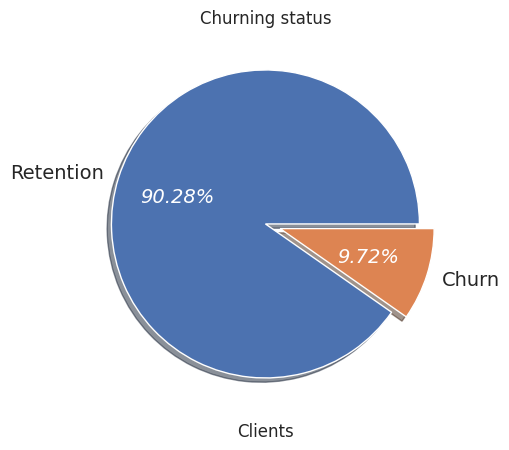

In [18]:
plt.figure(figsize = (5,5))
patches, texts, autotexts = plt.pie(churn_percent_pie['Companies'], labels = ['Retention', 'Churn']
        , autopct = '%1.2f%%', textprops = {'fontsize': 14}
        , explode = (0,0.1), shadow = True)

for auto in autotexts:
  auto.set_fontsize(14)
  auto.set_horizontalalignment('center')
  auto.set_fontstyle('italic')
  auto.set_color('white')

plt.title('Churning status')
plt.xlabel('Clients')
plt.show()

## Sales channel of client_data

In [19]:
category_channel = pd.DataFrame({'Name': client_data['channel_sales'].unique()}).sort_values(by = 'Name')
category_channel['Encoded'] = pd.factorize(category_channel['Name'])[0]
print('Categories of sale_channel: ', '\n', category_channel.to_string(index = False))

Categories of sale_channel:  
                             Name  Encoded
                         MISSING        0
epumfxlbckeskwekxbiuasklxalciiuu        1
ewpakwlliwisiwduibdlfmalxowmwpci        2
fixdbufsefwooaasfcxdxadsiekoceaa        3
foosdfpfkusacimwkcsosbicdxkicaua        4
lmkebamcaaclubfxadlmueccxoimlema        5
sddiedcslfslkckwlfkdpoeeailfpeds        6
usilxuppasemubllopkaafesmlibmsdf        7


In [20]:
channel_percent = client_data[['channel_sales']].value_counts(normalize = True).mul(100).round(2).to_frame()
channel_percent.columns = ['Percent']
channel_percent.index, channel_percent.index.name = [i[0] for i in channel_percent.index],client_data[['channel_sales']].keys()[0]
channel_percent.index = channel_percent.index.map(category_channel.set_index('Name')['Encoded'])
print('Number of clients by sales channel (%): ', '\n', channel_percent.T)

Number of clients by sales channel (%):  
 channel_sales      4     0      5     7     2     6     1     3
Percent        46.24  25.5  12.62  9.41  6.11  0.08  0.02  0.01


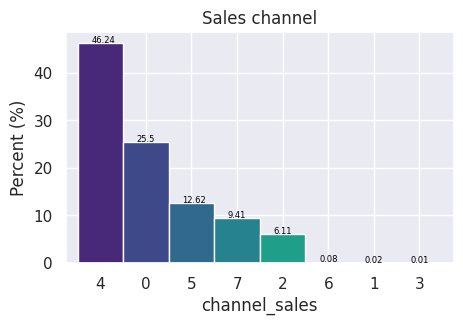

In [21]:
plot_normal_bar(channel_percent, 'Percent', (5,3), 0, 'Sales channel',tsize = 6)

Display the percentage of clients who are 'Retention' or 'Churn' by sales channel.

In [22]:
sale_channel_churn = client_data[['id','channel_sales', 'churn']]
sale_channel_churn = sale_channel_churn.value_counts(subset = ['channel_sales', 'churn']).unstack(level=1)
channel_churn_percent = (sale_channel_churn.div(sale_channel_churn.sum(axis = 1), axis = 0) * 100).round(2).sort_values(by = [1], ascending = False)
channel_churn_percent.index = channel_churn_percent.index.map(category_channel.set_index('Name')['Encoded'])
print('Number Rentention or Churn client by channel_sales (%): ', '\n', channel_churn_percent)

Number Rentention or Churn client by channel_sales (%):  
 churn               0      1
channel_sales               
4               87.86  12.14
7               89.96  10.04
2               91.60   8.40
0               92.40   7.60
5               94.41   5.59
1              100.00    NaN
3              100.00    NaN
6              100.00    NaN


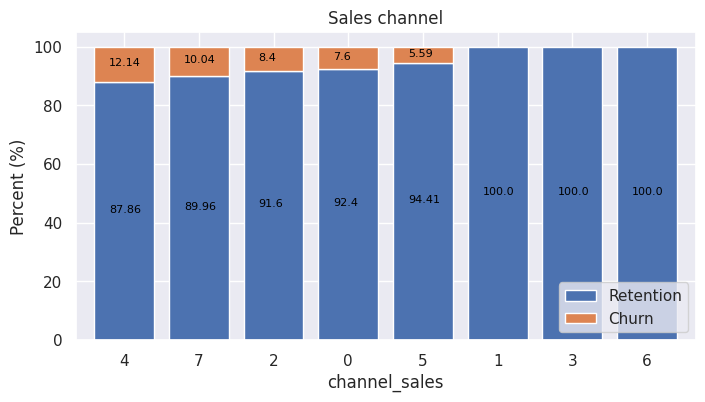

In [23]:
plot_stacked_bar(channel_churn_percent, [8,4],
                 0, 'Sales channel', ['Retention','Churn'],
                 'lower right', 8)

## Origin up of client_data

In [24]:
category_origin_up = pd.DataFrame({'Name': client_data['origin_up'].unique()}).sort_values(by = 'Name')
category_origin_up['Encoded'] = pd.factorize(category_origin_up['Name'])[0]
print('Encoded origin_up:','\n',category_origin_up.to_string(index = False))

Encoded origin_up: 
                             Name  Encoded
                         MISSING        0
ewxeelcelemmiwuafmddpobolfuxioce        1
kamkkxfxxuwbdslkwifmmcsiusiuosws        2
ldkssxwpmemidmecebumciepifcamkci        3
lxidpiddsbxsbosboudacockeimpuepw        4
usapbepcfoloekilkwsdiboslwaxobdp        5


In [25]:
origin_up_percent = client_data[['origin_up']].value_counts(normalize = True).mul(100).round(2).to_frame()
origin_up_percent.columns = ['Percent']
origin_up_percent.index, origin_up_percent.index.name = [i[0] for i in origin_up_percent.index],client_data[['origin_up']].keys()[0]
origin_up_percent.index = origin_up_percent.index.map(category_origin_up.set_index('Name')['Encoded'])
print('Number of clients by sales channel (%): ', '\n', channel_percent.T)

Number of clients by sales channel (%):  
 channel_sales      4     0      5     7     2     6     1     3
Percent        46.24  25.5  12.62  9.41  6.11  0.08  0.02  0.01


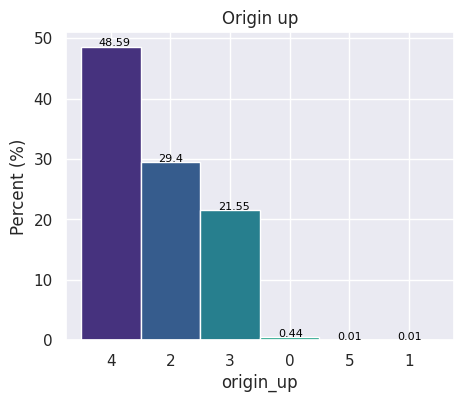

In [26]:
plot_normal_bar(origin_up_percent, 'Percent', (5,4), 0, 'Origin up',tsize = 8)

Display the percentage of clients who are 'Retention' or 'Churn' by origine up.

In [27]:
origin_up_churn = client_data[['id','origin_up', 'churn']]
origin_up_churn = origin_up_churn.value_counts(subset = ['origin_up', 'churn']).unstack(level=1)
origin_churn_percent = (origin_up_churn.div(origin_up_churn.sum(axis = 1), axis = 0) * 100).round(2).sort_values(by = [1], ascending = False)
origin_churn_percent.index = origin_churn_percent.index.map(category_origin_up.set_index('Name')['Encoded'])
print('Number Rentention or Churn client by channel_sales (%): ', '\n', origin_churn_percent)

Number Rentention or Churn client by channel_sales (%):  
 churn           0      1
origin_up               
4           87.42  12.58
3           91.61   8.39
0           93.75   6.25
2           93.99   6.01
1          100.00    NaN
5          100.00    NaN


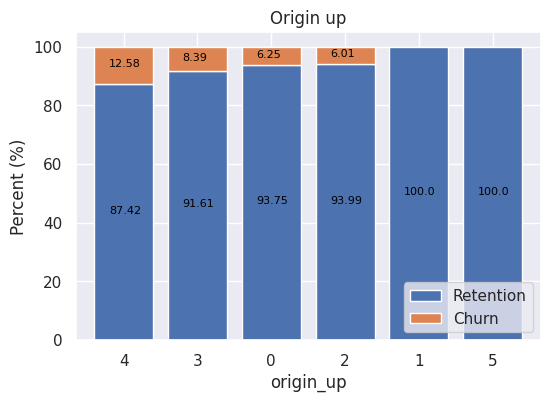

In [28]:
plot_stacked_bar(origin_churn_percent, [6,4],
                 0, 'Origin up', ['Retention','Churn'],
                 'lower right', 8)

## Date of activation of the contract of client_data

Percentages (%) of client have active contact by years: 
 Years    2003  2004  2005  2006  2007  2008   2009   2010   2011   2012  2013  \
Percent  0.27  0.94  1.29  0.25  0.65  0.85  18.42  24.71  18.88  25.36  8.38   

Years    2014  
Percent  0.01  


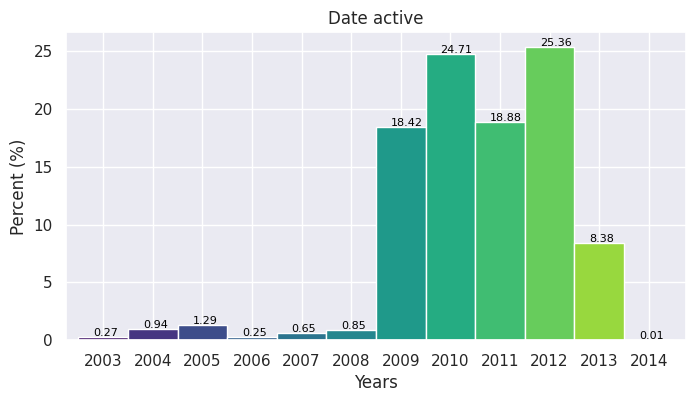

In [29]:
date_activ = client_data['id'].copy().to_frame()
date_activ['Years'] = client_data['date_activ'].dt.year
count_by_year = date_activ.groupby('Years').count() / date_activ.shape[0] *100
count_by_year = count_by_year.round(2)
count_by_year.columns = ['Percent']
print('Percentages (%) of client have active contact by years:','\n',count_by_year.T)
plot_normal_bar(count_by_year, 'Percent', (8,4), 0, 'Date active',tsize = 8)

Number Rentention or Churn client by channel_sales (%):  
 churn       0      1
Years               
2013    84.72  15.28
2012    87.69  12.31
2003    89.74  10.26
2011    90.14   9.86
2004    91.24   8.76
2009    92.23   7.77
2010    92.82   7.18
2006    94.44   5.56
2005    94.71   5.29
2008    95.16   4.84
2007    97.89   2.11
2014   100.00    NaN


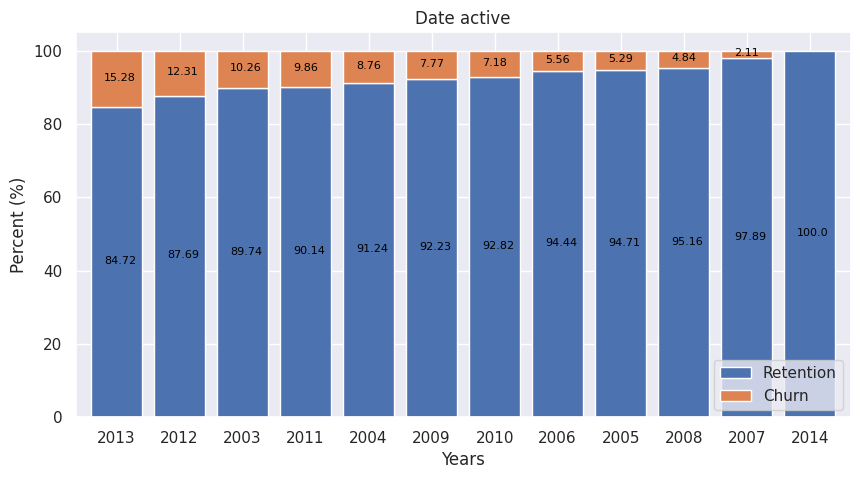

In [30]:
date_churn = date_activ.merge(client_data[['id','churn']], on = 'id', how = 'left')
date_churn = date_churn.value_counts(subset = ['Years', 'churn']).unstack(level=1)
date_churn_per = (date_churn.div(date_churn.sum(axis = 1), axis = 0) * 100).round(2).sort_values(by = [1], ascending = False)
print('Number Rentention or Churn client by channel_sales (%): ', '\n', date_churn_per)

plot_stacked_bar(date_churn_per, [10,5], 0, 'Date active', ['Retention','Churn'],'lower right', 8)

## Antiquity of the client

Percent of number antiquity of the client:  
 num_years_antig        1         2          3          4          5   \
Percent          0.006847  0.075312  16.657538  27.262769  15.863344   

num_years_antig         6         7        8         9         10        11  \
Percent          32.650965  3.484869  0.70519  0.629878  0.554567  1.266603   

num_years_antig        12        13  
Percent          0.753115  0.089005  


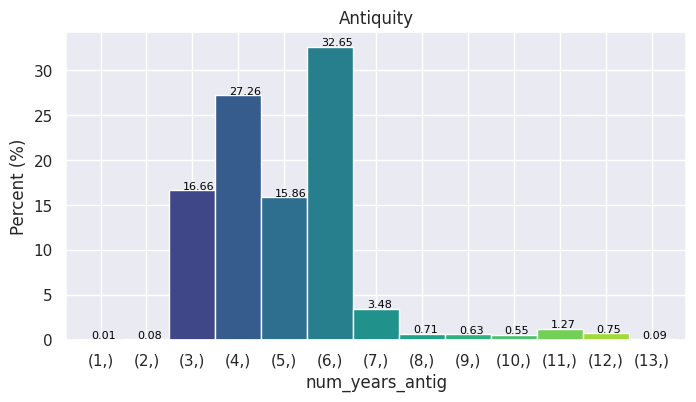

In [31]:
anti_year = client_data[['id','num_years_antig']]
anti_year_count = anti_year.value_counts(subset = ['num_years_antig'],normalize=True).mul(100).sort_index().to_frame()
anti_year_count.columns = ['Percent']
print('Percent of number antiquity of the client: ','\n',anti_year_count.T)
plot_normal_bar(anti_year_count, 'Percent', (8,4), 0, 'Antiquity',tsize = 8)

Number Rentention or Churn client by channel_sales (%):  
 churn                 0      1
num_years_antig               
2                 72.73  27.27
3                 86.48  13.52
4                 88.15  11.85
12                90.00  10.00
5                 91.37   8.63
7                 91.75   8.25
13                92.31   7.69
6                 92.89   7.11
11                93.51   6.49
10                95.06   4.94
8                 95.15   4.85
9                 98.91   1.09
1                100.00    NaN


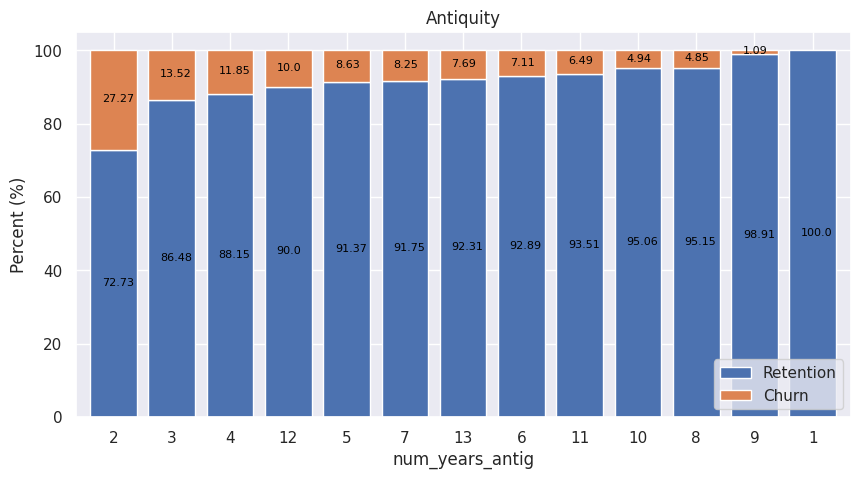

In [32]:
anti_year_churn = anti_year.merge(client_data[['id','churn']], on = 'id', how = 'left')
anti_year_churn_per = anti_year_churn.value_counts(subset = ['num_years_antig', 'churn']).unstack(level=1)
anti_year_churn_per = (anti_year_churn_per.div(anti_year_churn_per.sum(axis = 1), axis = 0) * 100).round(2).sort_values(by = [1], ascending = False)
print('Number Rentention or Churn client by channel_sales (%): ', '\n', anti_year_churn_per)

plot_stacked_bar(anti_year_churn_per, [10,5], 0, 'Antiquity', ['Retention','Churn'],'lower right', 8)

## forecast_discount_energy

Percent of forecast_discount_energy:  
 forecast_discount_energy       0.0       5.0       10.0      17.0      19.0  \
Percent                   96.494591  0.006847  0.006847  0.013693  0.013693   

forecast_discount_energy      22.0      23.0     24.0      25.0      26.0  \
Percent                   0.321786  0.013693  0.56826  0.047926  0.034233   

forecast_discount_energy      28.0     30.0  
Percent                   0.698343  1.78009  


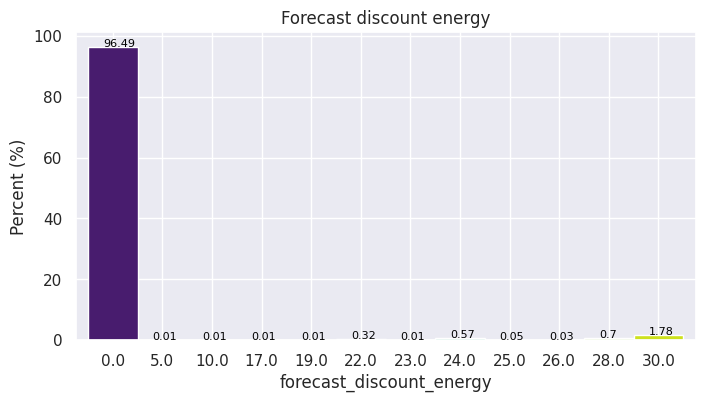

In [33]:
dist = client_data[['id','forecast_discount_energy']]
dist_per = dist.value_counts(normalize=True, subset='forecast_discount_energy').mul(100).sort_index().to_frame()
dist_per.columns = ['Percent']
print('Percent of forecast_discount_energy: ','\n',dist_per.T)

plot_normal_bar(dist_per, 'Percent', (8,4), 0, 'Forecast discount energy',tsize = 8)

## Gas client

Percent of gas client:  
 has_gas          f          t
Percent  81.849925  18.150075


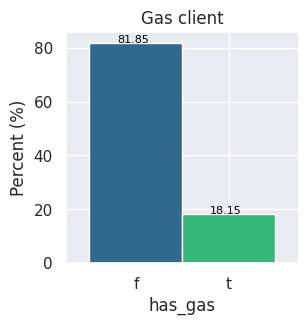

In [34]:
has_gas = client_data[['id','has_gas']]
has_gas_per = has_gas.value_counts(subset = 'has_gas', normalize=True).mul(100).to_frame()
has_gas_per.columns = ['Percent']
print('Percent of gas client: ','\n',has_gas_per.T)

plot_normal_bar(has_gas_per, 'Percent', (3,3), 0, 'Gas client',tsize = 8)

Number Rentention or Churn client by channel_sales (%):  
 churn        0      1
has_gas              
f        89.95  10.05
t        91.81   8.19


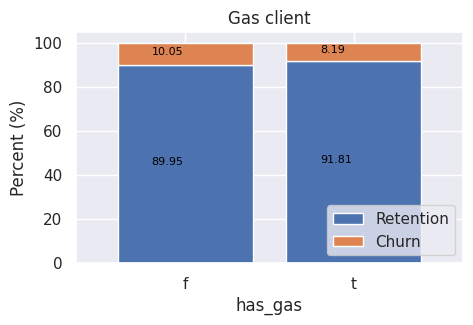

In [35]:
has_gas_churn = has_gas.merge(client_data[['id','churn']], on = 'id', how = 'left')
has_gas_churn = has_gas_churn.value_counts(subset = ['has_gas', 'churn']).unstack(level=1)
has_gas_churn = (has_gas_churn.div(has_gas_churn.sum(axis = 1), axis = 0) * 100).round(2).sort_values(by = [1], ascending = False)
print('Number Rentention or Churn client by channel_sales (%): ', '\n', has_gas_churn)

plot_stacked_bar(has_gas_churn, [5,3], 0, 'Gas client', ['Retention','Churn'],'lower right', 8)

## Consumption of client_data

In [36]:
def plot_distribution(dataframe, column, ax, bins_ = 50):
  temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
  "Churn":dataframe[dataframe["churn"]==1][column]})
  # Plot the histogram
  temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
  # X-axis label
  ax.set_xlabel(column)
  # Change the x-axis to plain style
  ax.ticklabel_format(style='plain', axis='x')

In [37]:
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
consumption.head()

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,f,0


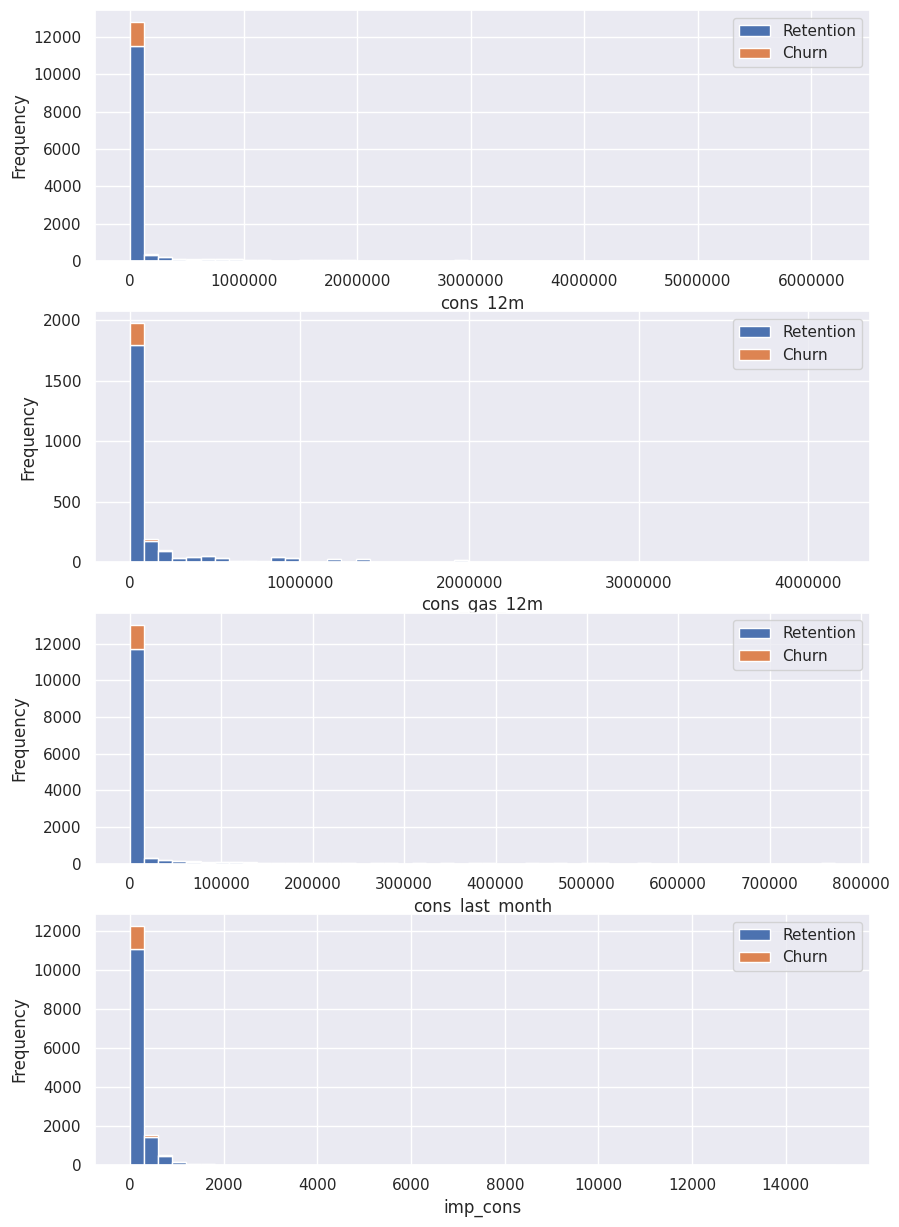

In [38]:
fig, ax = plt.subplots(nrows = 4, figsize = (10,15))

plot_distribution(consumption, 'cons_12m', ax[0], bins_ = 50)
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', ax[1], bins_ = 50)
plot_distribution(consumption, 'cons_last_month', ax[2], bins_ = 50)
plot_distribution(consumption, 'imp_cons', ax[3], bins_ = 50)

plt.show()

Since the all of histograms are Right-skewed distrubution, it can be said that the data is mostly concertrated in small values. So, there are some outliers and we use boxplot to more clearly its.

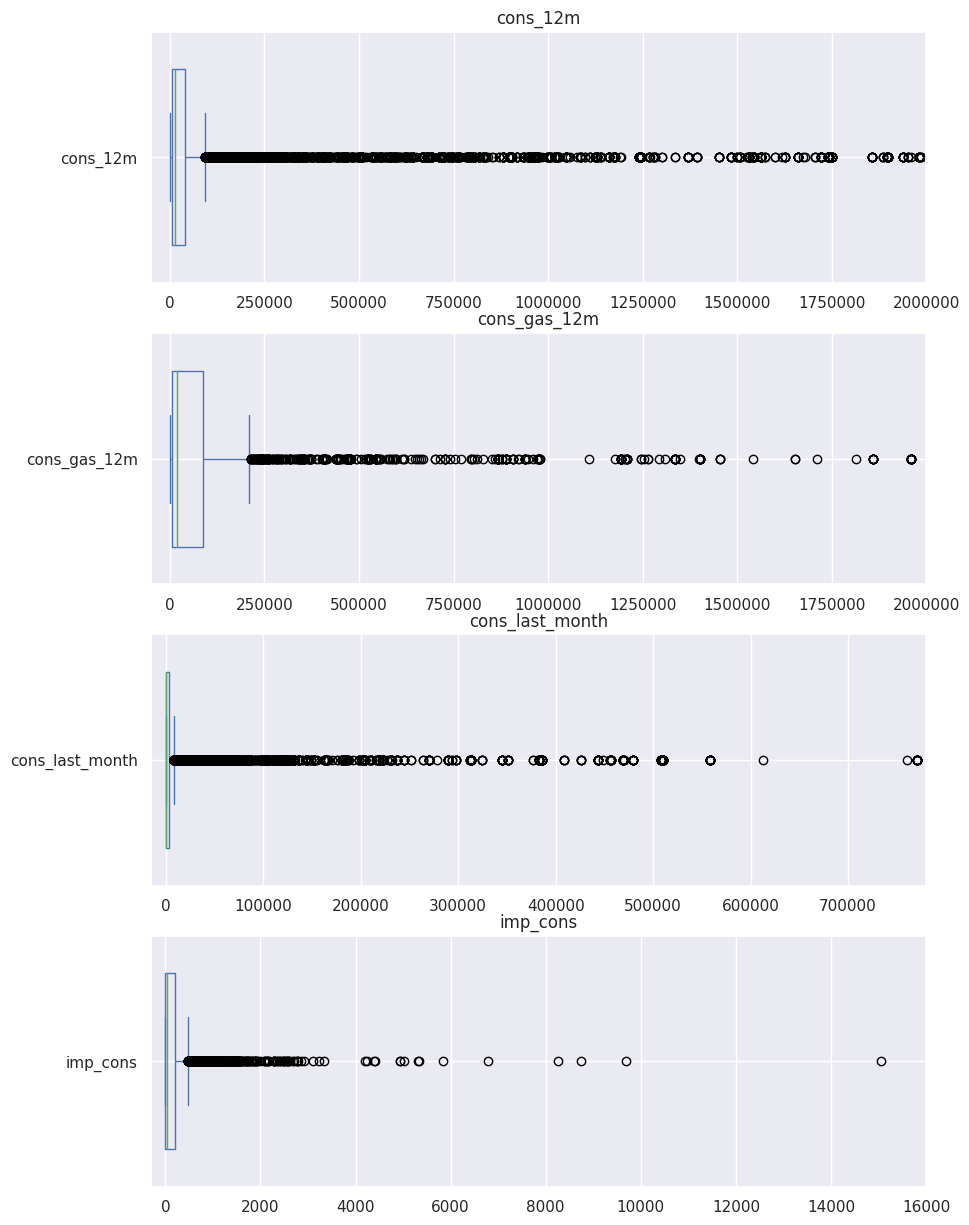

In [39]:
fig, ax = plt.subplots(nrows = 4, figsize = (10,15))

consumption['cons_12m'].plot(kind = 'box', ax = ax[0], title = 'cons_12m', widths = 0.7, vert = False)
consumption[consumption['has_gas'] == 't']['cons_gas_12m'].plot(kind = 'box', ax = ax[1], title = 'cons_gas_12m', widths = 0.7, vert = False)
consumption['cons_last_month'].plot(kind = 'box', ax = ax[2], title = 'cons_last_month', widths = 0.7, vert = False)
consumption['imp_cons'].plot(kind = 'box', ax = ax[3], title = 'imp_cons', widths = 0.7, vert = False)

for i in range(4):
  ax[i].ticklabel_format(style='plain', axis='x')
  if i in [0,1]:
    ax[i].set_xlim(-50000, 2000000)
  elif i == 2:
    ax[i].set_xlim(-15000, 780000)
  else:
    ax[i].set_xlim(-300, 16000)

plt.show()

## Forecast of client_data

In [40]:
forecast = client_data[['id', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak','churn']]
forecast.head(3)
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   forecast_cons_12m               14606 non-null  float64
 2   forecast_cons_year              14606 non-null  int64  
 3   forecast_meter_rent_12m         14606 non-null  float64
 4   forecast_price_energy_off_peak  14606 non-null  float64
 5   forecast_price_energy_peak      14606 non-null  float64
 6   forecast_price_pow_off_peak     14606 non-null  float64
 7   churn                           14606 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 913.0+ KB


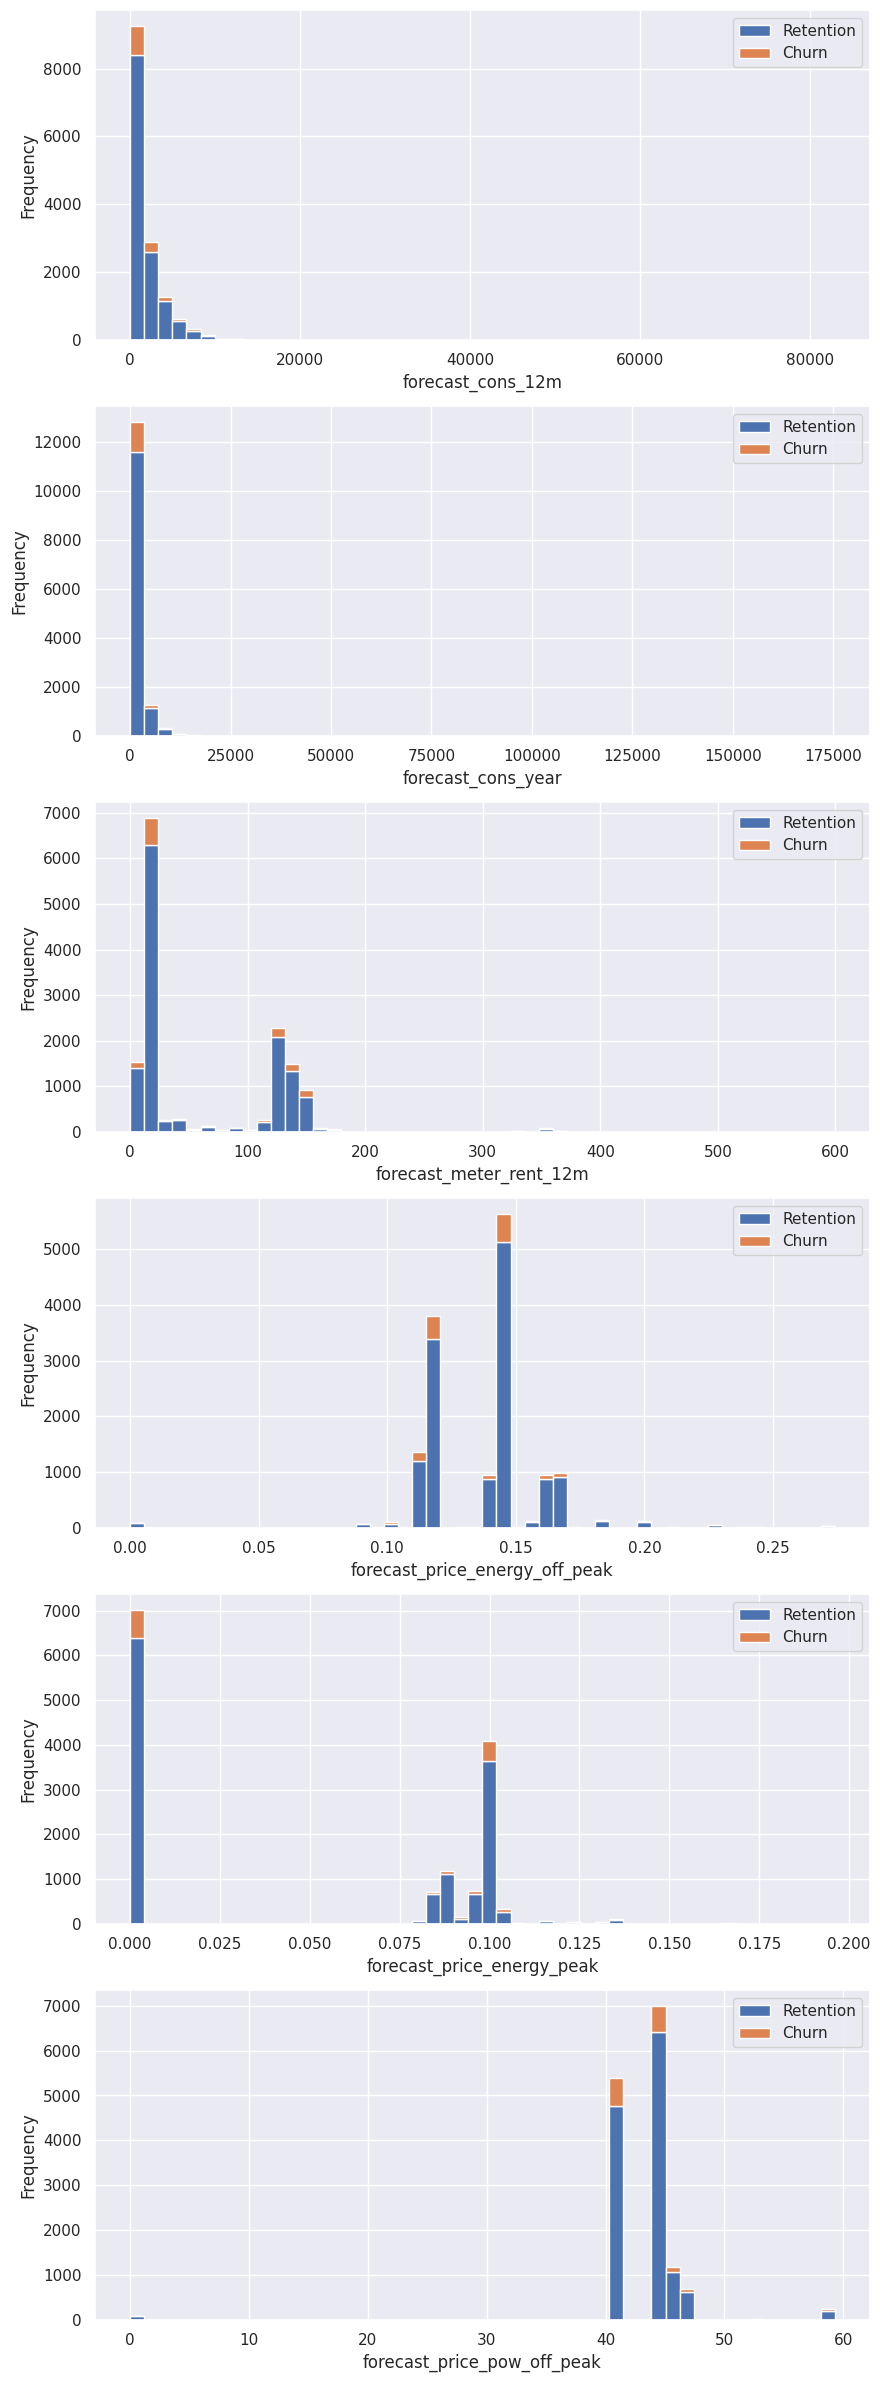

In [41]:
fig, ax = plt.subplots(nrows = 6, figsize = (10,30))
plot_distribution(forecast, 'forecast_cons_12m', ax[0])
plot_distribution(forecast, 'forecast_cons_year', ax[1])
plot_distribution(forecast, 'forecast_meter_rent_12m', ax[2])
plot_distribution(forecast, 'forecast_price_energy_off_peak', ax[3])
plot_distribution(forecast, 'forecast_price_energy_peak', ax[4])
plot_distribution(forecast, 'forecast_price_pow_off_peak', ax[5])

## Price off peak of price_data

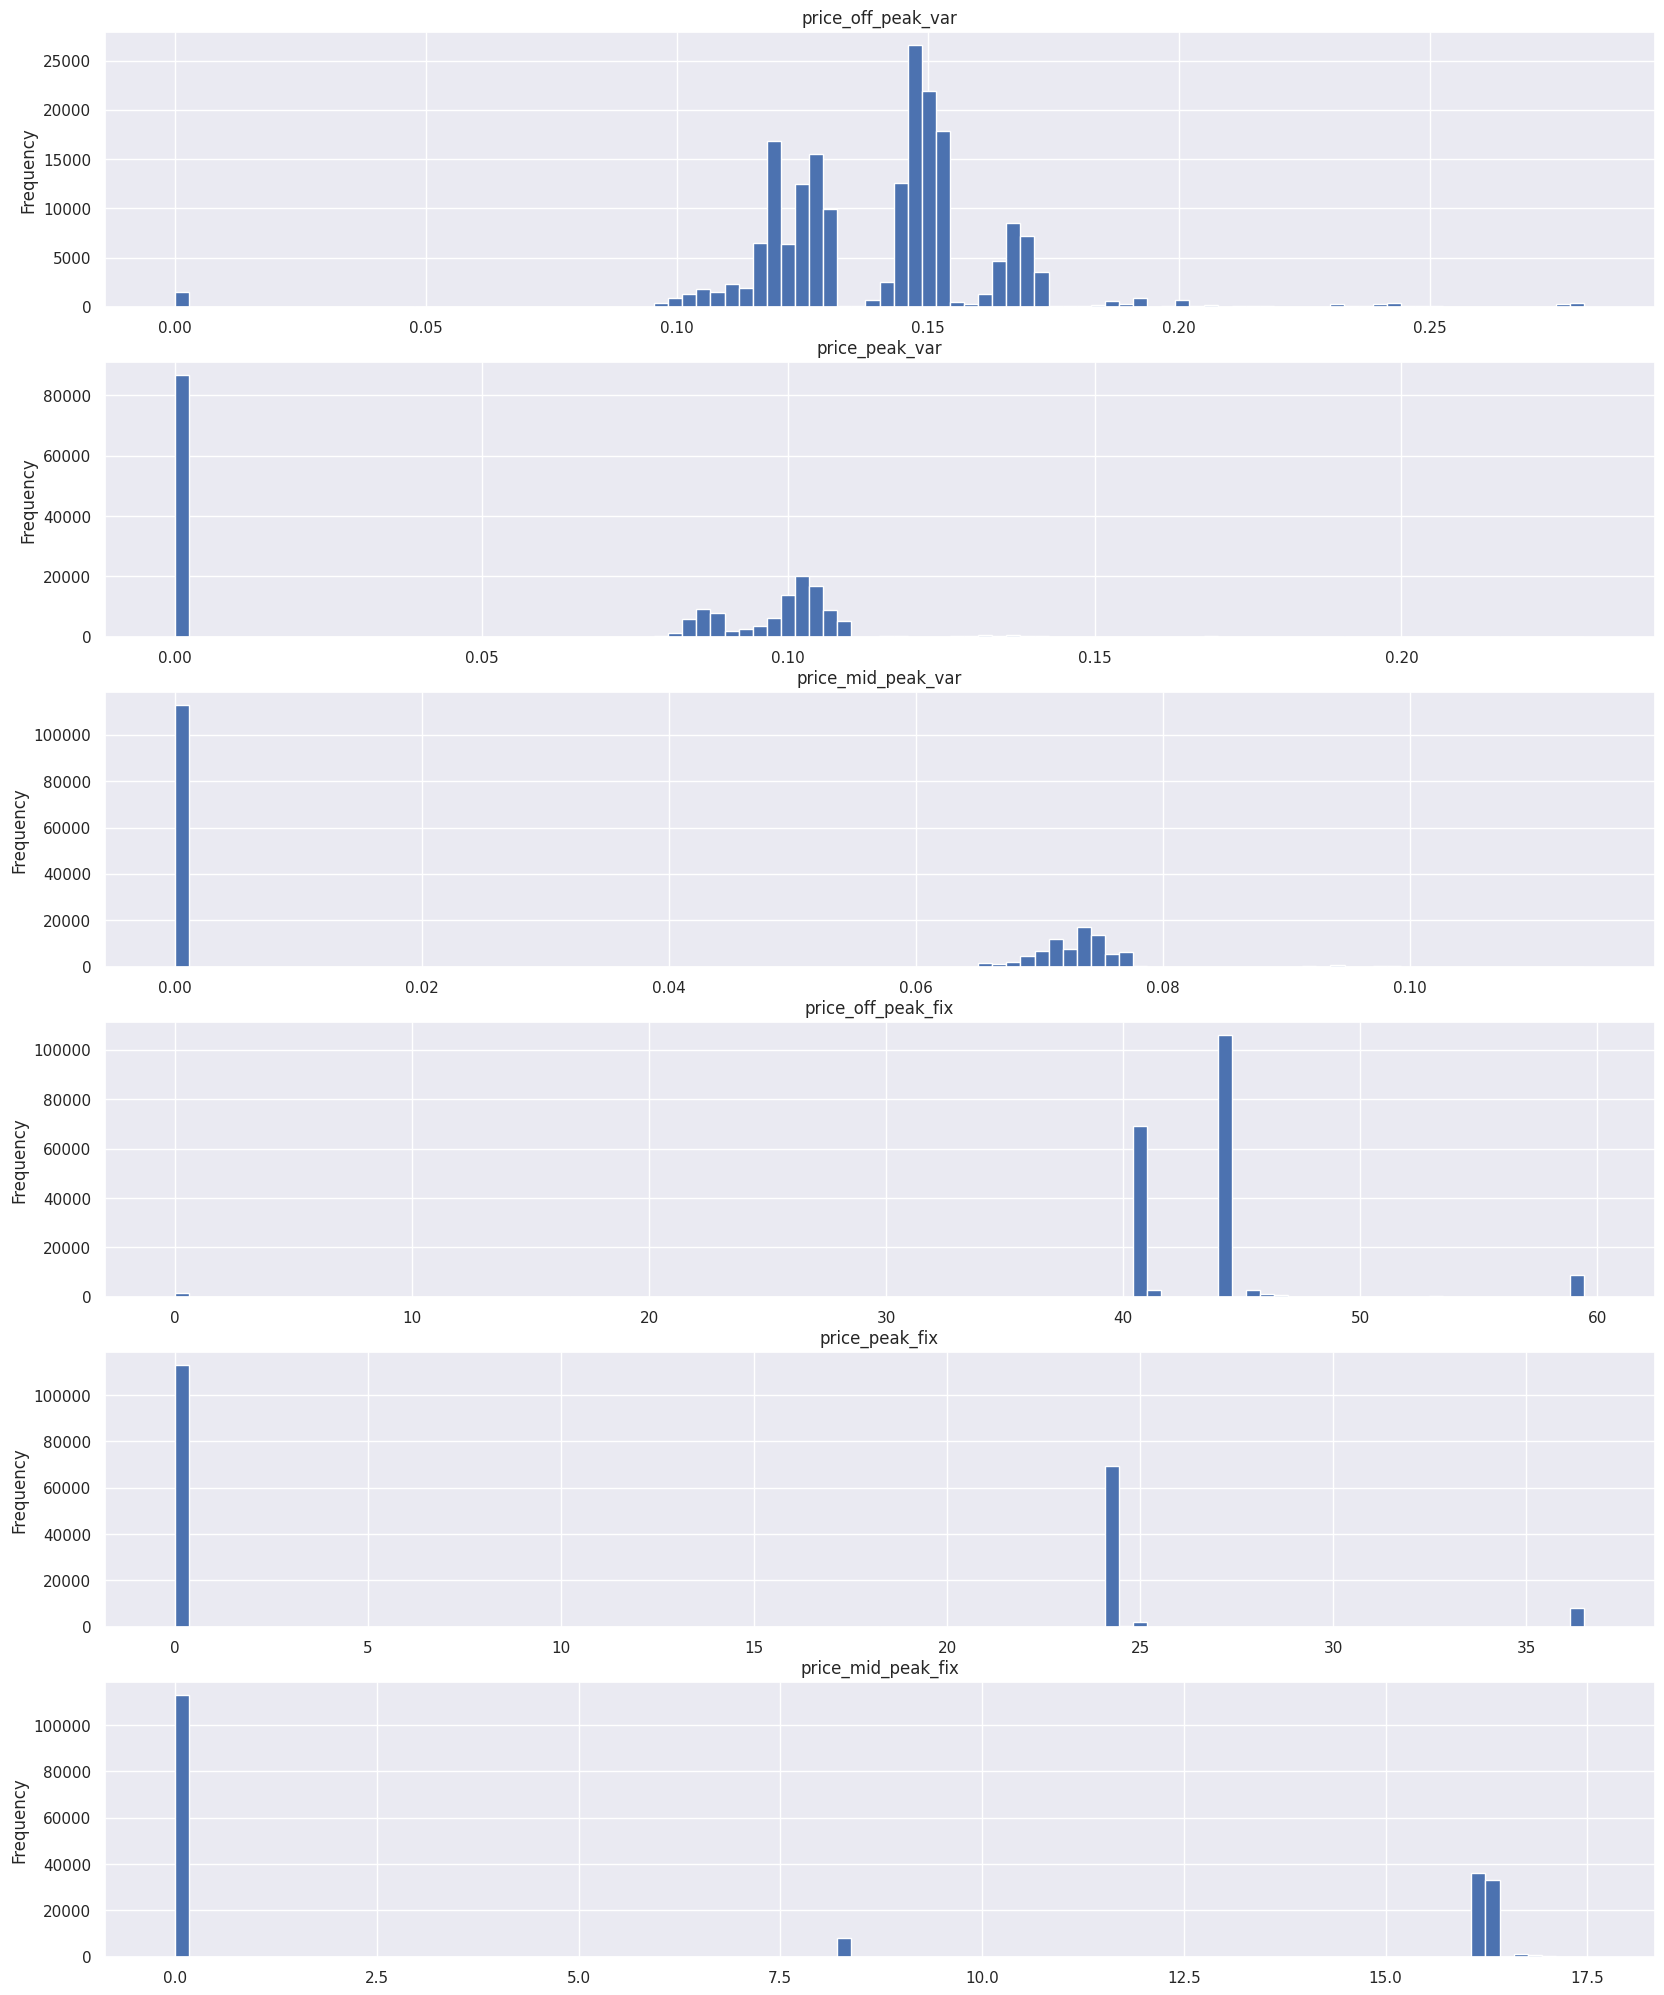

In [42]:
price = price_data[['price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']]
fig, ax = plt.subplots(nrows = price.shape[1], figsize = (20,25))
for i,attr in enumerate(price.columns):
  price[attr].plot(kind = 'hist', ax = ax[i], title = attr, bins = 100)

There are a lot of value that equal to 0 on price_peak_var, price_mid_peak_var, price_peak_fix, price_mid_peak_fix.

# Hypothesis Investigation

In [43]:
mean_year = price_data.groupby('id').mean().reset_index()
mean_year = mean_year.rename(index=str, columns={"price_off_peak_var": "mean_year_price_off_peak_var",
                                                 "price_peak_var": "mean_year_price_peak_var",
                                                 "price_mid_peak_var": "mean_year_price_mid_peak_var",
                                                 "price_off_peak_fix": "mean_year_price_off_peak_fix",
                                                 "price_peak_fix": "mean_year_price_peak_fix",
                                                 "price_mid_peak_fix": "mean_year_price_mid_peak_fix"})
mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_mid_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]
mean_year = mean_year.drop(columns = ['price_date'])
mean_year.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000


In [44]:
mean_3m = price_data[price_data['price_date'] > '2015-10-01'].groupby('id').mean().reset_index()
mean_3m = mean_3m.rename(index=str, columns={"price_off_peak_var": "mean_3m_price_off_peak_var",
                                             "price_peak_var": "mean_3m_price_peak_var",
                                             "price_mid_peak_var": "mean_3m_price_mid_peak_var",
                                             "price_off_peak_fix": "mean_3m_price_off_peak_fix",
                                             "price_peak_fix": "mean_3m_price_peak_fix",
                                             "price_mid_peak_fix": "mean_3m_price_mid_peak_fix"})
mean_3m["mean_3m_price_off_peak"] = mean_3m["mean_3m_price_off_peak_var"] + mean_3m["mean_3m_price_off_peak_fix"]
mean_3m["mean_3m_price_peak"] = mean_3m["mean_3m_price_peak_var"] + mean_3m["mean_3m_price_peak_fix"]
mean_3m["mean_3m_price_mid_peak"] = mean_3m["mean_3m_price_mid_peak_var"] + mean_3m["mean_3m_price_mid_peak_fix"]
mean_3m = mean_3m.drop(columns = ['price_date'])
mean_3m.head()

,id,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


In [45]:
mean_6m = price_data[price_data['price_date'] > '2015-06-01'].groupby('id').mean().reset_index()
mean_6m = mean_6m.rename(index=str, columns={"price_off_peak_var": "mean_6m_price_off_peak_var",
                                             "price_peak_var": "mean_6m_price_peak_var",
                                             "price_mid_peak_var": "mean_6m_price_mid_peak_var",
                                             "price_off_peak_fix": "mean_6m_price_off_peak_fix",
                                             "price_peak_fix": "mean_6m_price_peak_fix",
                                             "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"})
mean_6m["mean_6m_price_off_peak"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_peak"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_mid_peak"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]
mean_6m = mean_6m.drop(columns = ['price_date'])
mean_6m.head()

,id,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555,40.843313,24.533410,16.360973
4,00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000


In [46]:
merge_price = pd.merge(mean_year, mean_3m, on='id', how='left')
merge_price = pd.merge(merge_price, mean_6m, on='id', how='left')
merge_price.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_3m_price_mid_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365274,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360964,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555,40.843313,24.533410,16.360973
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000


In [47]:
price_analysis = pd.merge(merge_price, client_data[['id', 'churn']], on='id')
price_analysis.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_mid_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.123007,0.104108,0.075469,40.728885,24.43733,16.291555,40.851892,24.541438,16.367024,0


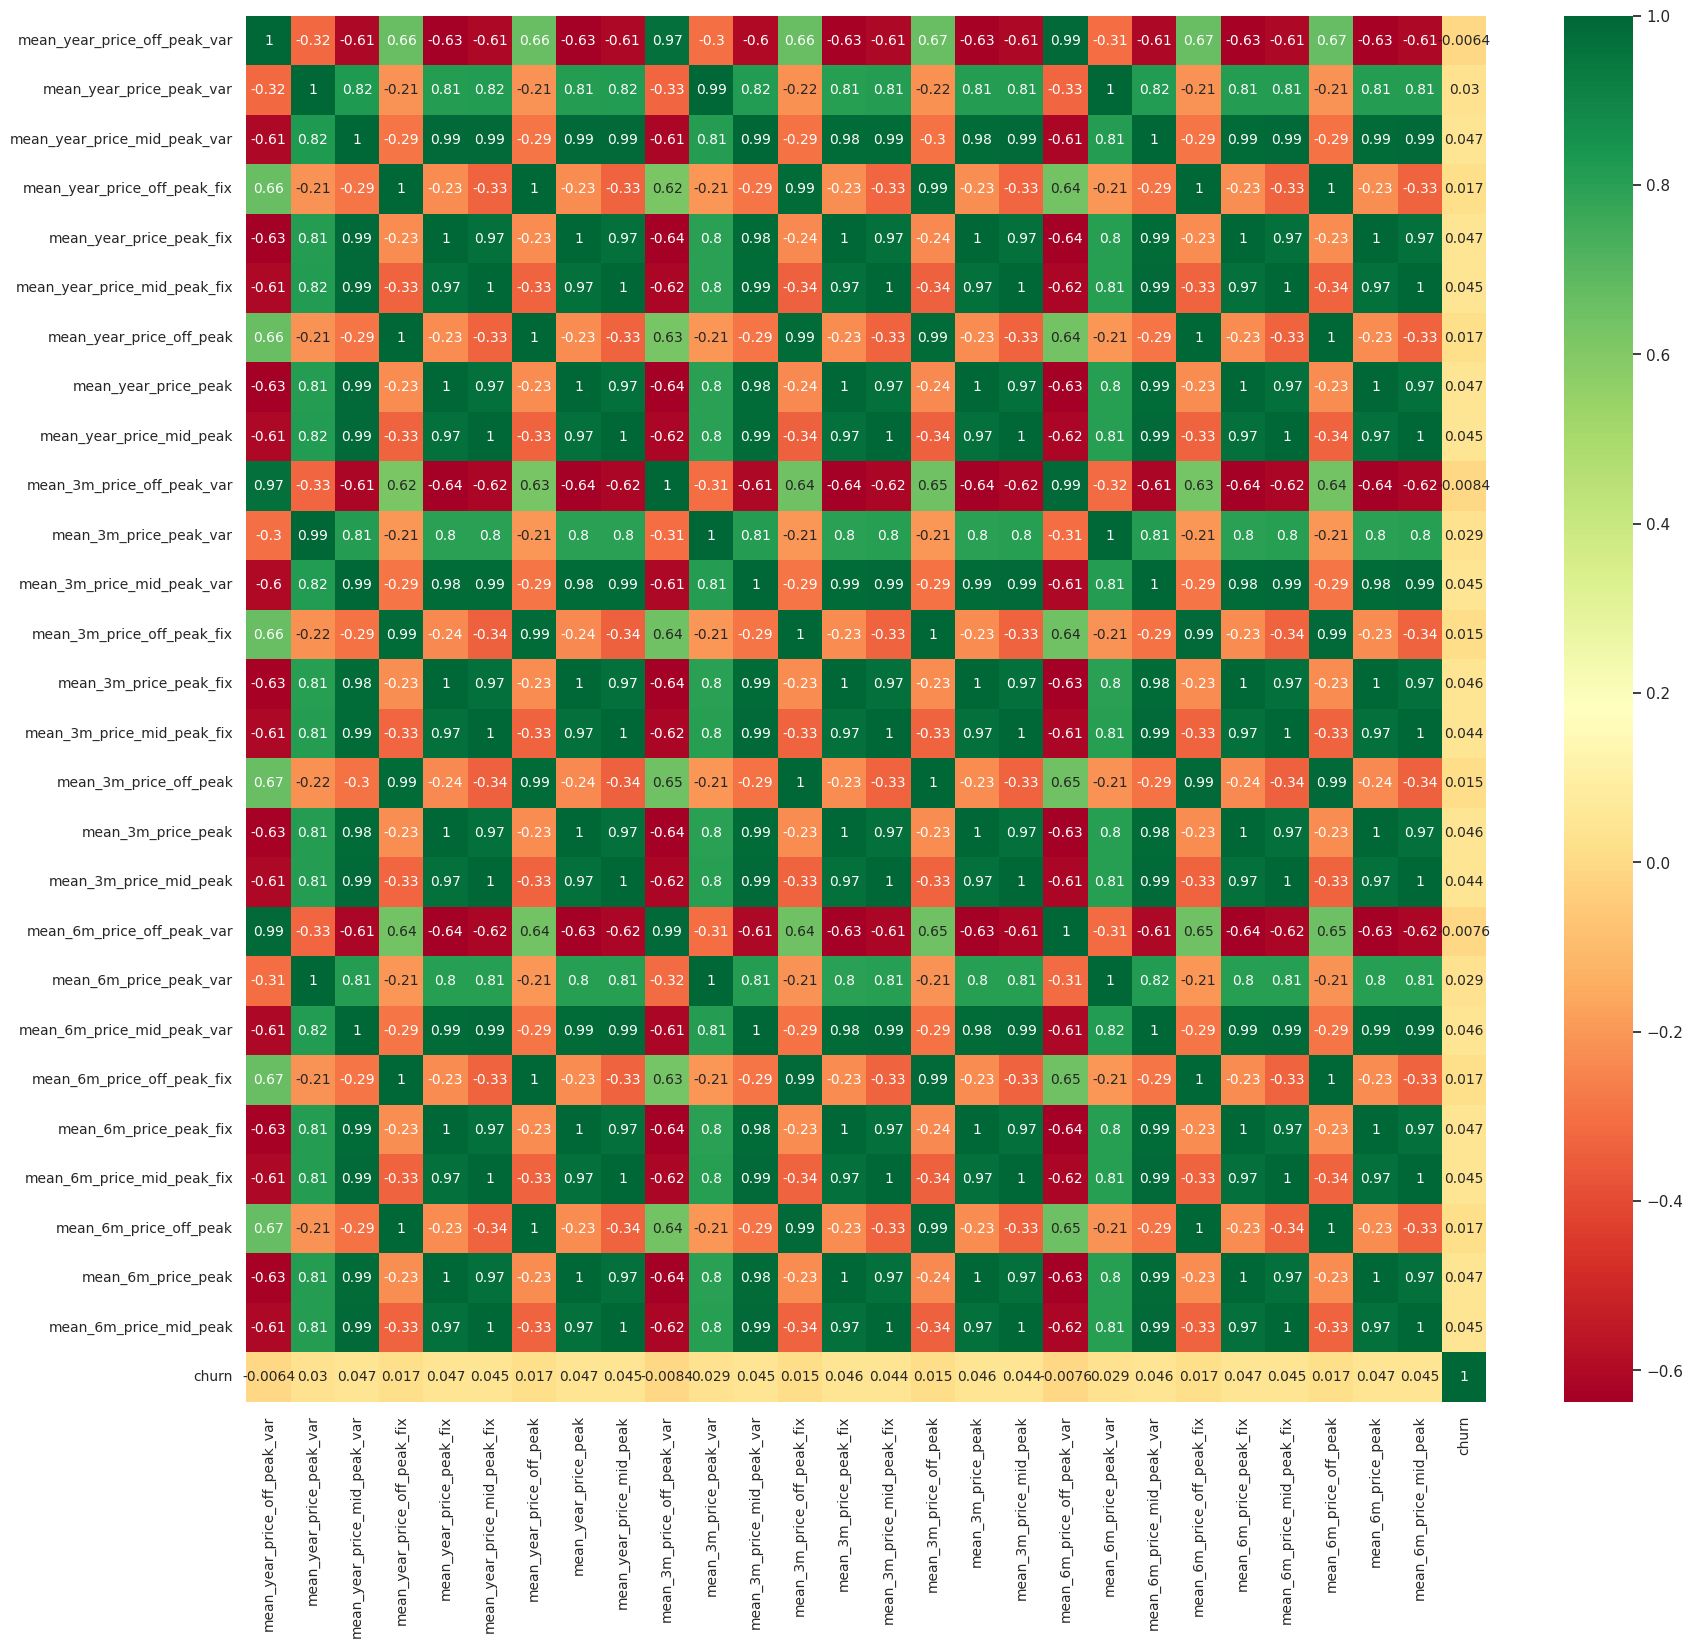

In [48]:
corr = price_analysis.corr(numeric_only=True)
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            annot = True, cmap='RdYlGn', annot_kws={'size':10})

# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("View of Correlation.png", bbox_inches="tight")
plt.show()

Go through the graph above, we'll see the relationship of churn to each mean values close to 0, so their have no linear relationship. Therefore, we can say the client are not price sentivity.